<a href="https://colab.research.google.com/github/sharulshafie/Passengers-Survived-the-Titanic-Shipwreck-Prediction-using-NN-from-Scratch/blob/main/Passengers_Survived_the_Titanic_Shipwreck_Prediction_using_NN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#load dataset

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle competitions download -c titanic
! unzip titanic

#import library

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #change data to range from 0 to 1 (normalization technique)

import matplotlib.pyplot as plt 
import seaborn as sns 

#data preparation

In [ ]:
df = pd.read_csv('/content/train.csv')
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

#fill missing value 
df =  df.fillna({"Age" : df.Age.median(), "Embarked" : df.Embarked.mode()[0]})

#one-hot encoding (what is it use for?) 
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
# https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc
df = pd.get_dummies(df, columns = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"])

#min-max scaler (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
scaler = MinMaxScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,0.472229,0.139136,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,0.321438,0.015469,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,0.434531,0.015713,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
# ref 

# df.head()
df.describe()
# df.Age.median()
# df.Embarked.mode()[0]
# print(scaler.fit_transform(df[["Age", "Fare"]]))

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.363679,0.062858,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,...,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.486592,0.163605,0.096995,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,...,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.346569,0.028213,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.060508,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA

In [ ]:
! pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sweetviz as sv 

report = sv.analyze(df)
report.show_html('titanic.html', open_browser=False)

In [ ]:
import IPython
IPython.display.HTML('titanic.html')

#train test split

In [ ]:
X = df.drop("Survived", axis=1).values
y = df[['Survived']].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

# helper function

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
  N = labels.size
  mse = ((predictions - labels)**2).sum() / (2*N)
  return mse

# if the output_layer value is more than 0.5 (TRUE), the person survive
def accuracy(predictions, labels):
  predictions_correct = predictions.round() == labels
  accuracy = predictions_correct.mean()
  return accuracy 

# NN Architecture ([ref](https://alexlenail.me/NN-SVG/index.html))
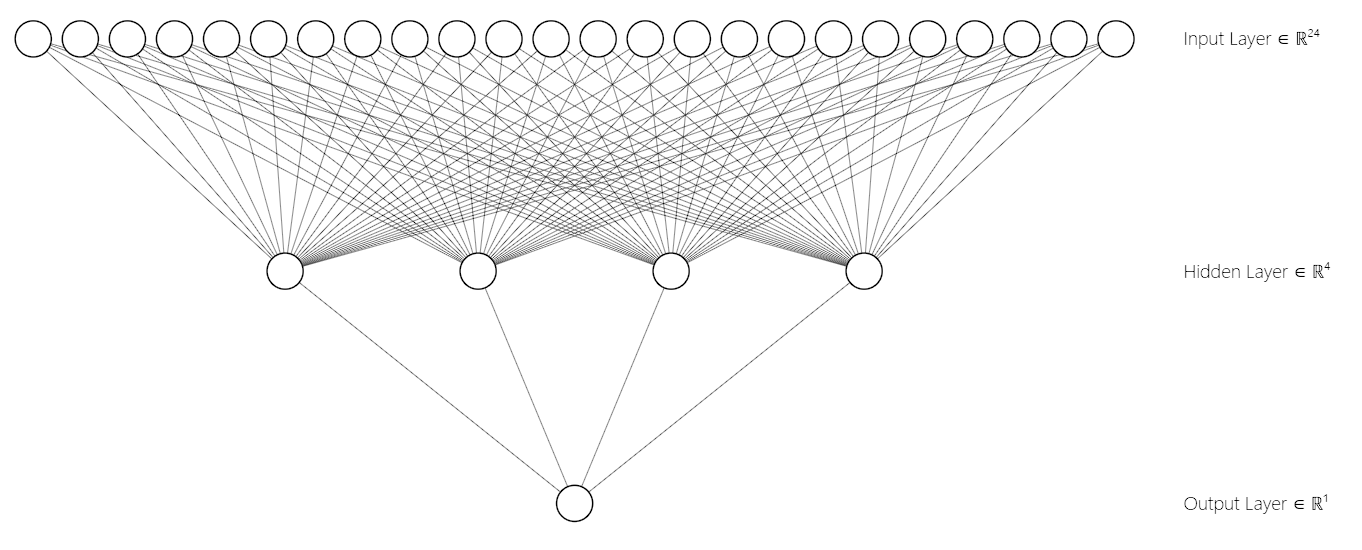

# parameter

In [ ]:
learning_rate = 0.2
epochs = 10000
N = train_y.size  #number of lable matrics is corresponds to the number of output matrics

n_input = train_X.shape[1]
n_hidden = 10
n_output = 1

In [ ]:
np.random.seed(10)

weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden))   #(24, 4) #scale = standard deviation
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output))  #(4, 1)

In [ ]:
monitoring = {"mean_squared_error": [], "accuracy": []}

for epoch in range(epochs):

  #feedforward 
  hidden_layer = sigmoid(np.dot(train_X, weights_1))       #  (712, 4)
  output_layer = sigmoid(np.dot(hidden_layer, weights_2))  #  (712, 1)

  #monitor training process
  mse = mean_squared_error(output_layer, train_y)
  acc = accuracy(output_layer, train_y)
  monitoring["mean_squared_error"].append(mse)
  monitoring["accuracy"].append(acc)

  #backpropagation
  output_delta = (output_layer - train_y) * output_layer * (1 - output_layer)                     #(712, 1)
  hidden_delta = np.dot(output_delta, weights_2.T) * hidden_layer * (1 - hidden_layer)  #(712, 4)   # T = transpose, flipping matrics 

  #weight updates 
  weights_2 -= learning_rate * np.dot(hidden_layer.T, output_delta) / N   # (4, 1)
  weights_1 -= learning_rate * np.dot(train_X.T, hidden_delta) / N        # (24, 4)

monitoring_df = pd.DataFrame(monitoring)

In [ ]:
monitoring_df

,mean_squared_error,accuracy
0,0.135455,0.622191
1,0.135100,0.622191
2,0.134747,0.622191
3,0.134398,0.622191
4,0.134052,0.622191
...,...,...
9995,0.063976,0.838483
9996,0.063975,0.838483
9997,0.063975,0.838483
9998,0.063975,0.838483


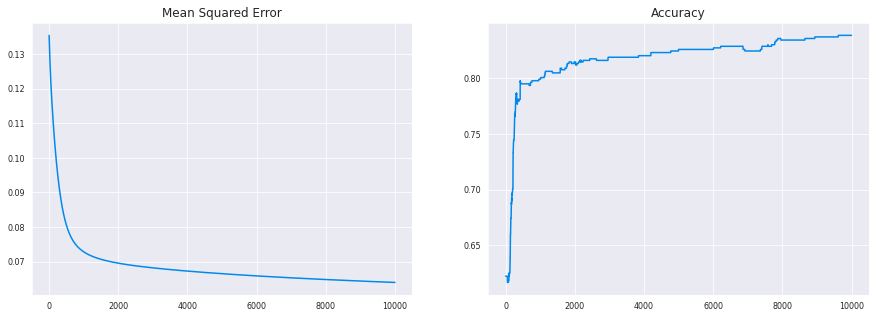

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

monitoring_df.mean_squared_error.plot(ax=axes[0], title="Mean Squared Error")
monitoring_df.accuracy.plot(ax=axes[1], title="Accuracy")

# test data 

In [ ]:
#feedforward
hidden_layer = sigmoid(np.dot(test_X, weights_1))         # (179, 4)
output_layer = sigmoid(np.dot(hidden_layer, weights_2))   # (179, 4)

accuracy(output_layer, test_y)

0.7597765363128491